<a href="https://colab.research.google.com/github/Rama-Pathak/Codsoft/blob/main/Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import the librares
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
# import the dataset
sales_pred=pd.read_csv("advertising.csv")
sales_pred

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [ ]:
# information of the data
sales_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
# check for the null values in the dataset
sales_pred.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
# correlation matrix
correlation=sales_pred.corr()
correlation

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


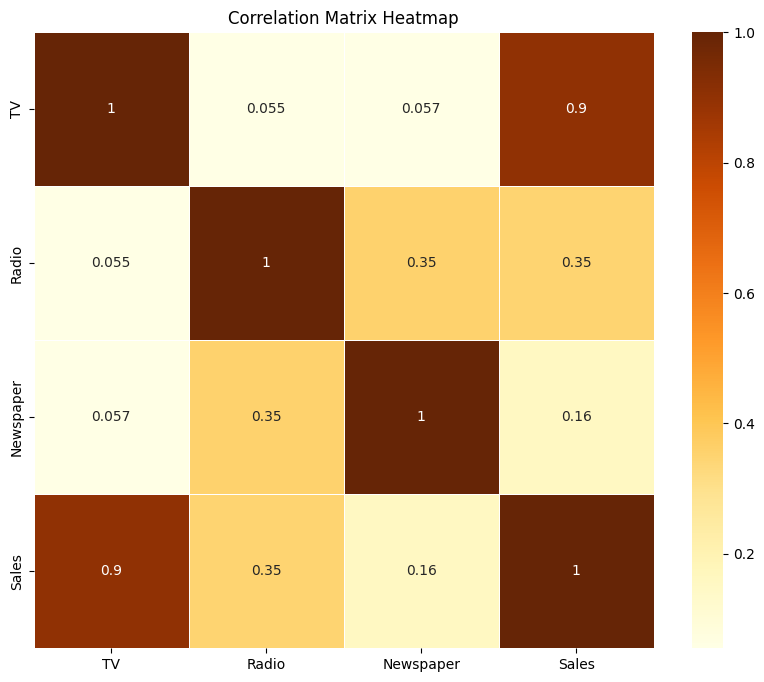

In [ ]:
# Heatmap of Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap="YlOrBr", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [ ]:
# grouping Tv by sales
sales_pred.groupby(['TV', 'Sales']).size().reset_index(name='count')

,TV,Sales,count
0,0.7,1.6,1
1,4.1,3.2,1
2,5.4,5.3,1
3,7.3,5.5,1
4,7.8,6.6,1
...,...,...,...
195,289.7,25.4,1
196,290.7,17.8,1
197,292.9,21.4,1
198,293.6,20.7,1


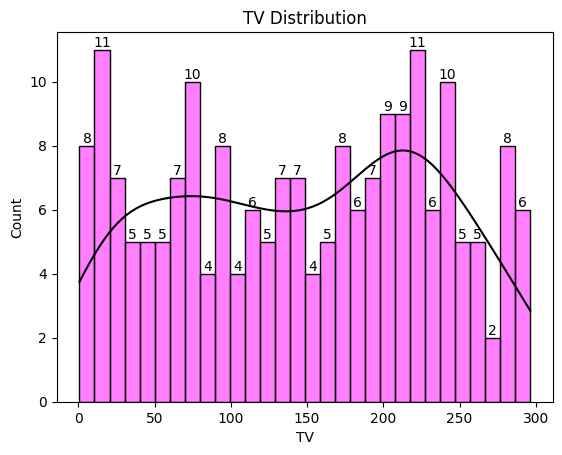

In [ ]:
# TV Distribution
dr=sns.histplot(data=sales_pred, x='TV', bins=30, kde=True,color='magenta')
dr.lines[0].set_color('black')
for container in dr.containers:
    dr.bar_label(container, fmt='%d')
plt.title("TV Distribution")
plt.show()

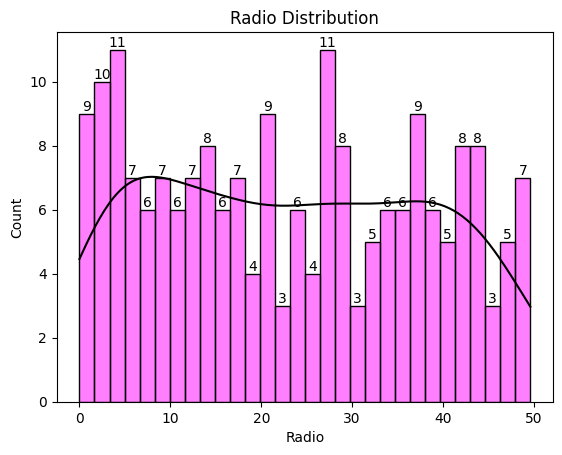

In [ ]:
# Radio Distribution
dr=sns.histplot(data=sales_pred, x='Radio', bins=30, kde=True,color='magenta')
dr.lines[0].set_color('black')
for container in dr.containers:
    dr.bar_label(container, fmt='%d')
plt.title("Radio Distribution")
plt.show()

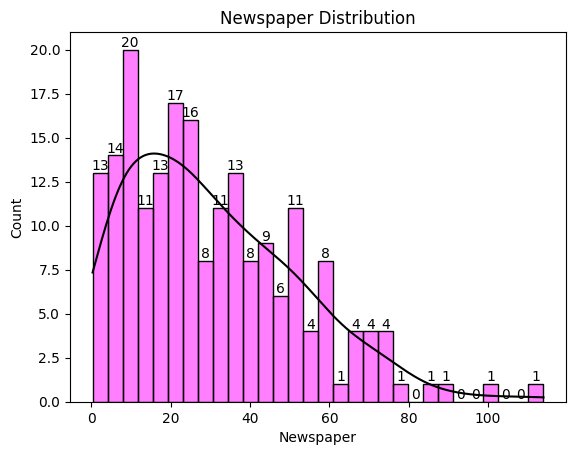

In [ ]:
# Newspaper Distribution
dr=sns.histplot(data=sales_pred, x='Newspaper', bins=30, kde=True,color='magenta')
dr.lines[0].set_color('black')
for container in dr.containers:
    dr.bar_label(container, fmt='%d')
plt.title("Newspaper Distribution")
plt.show()

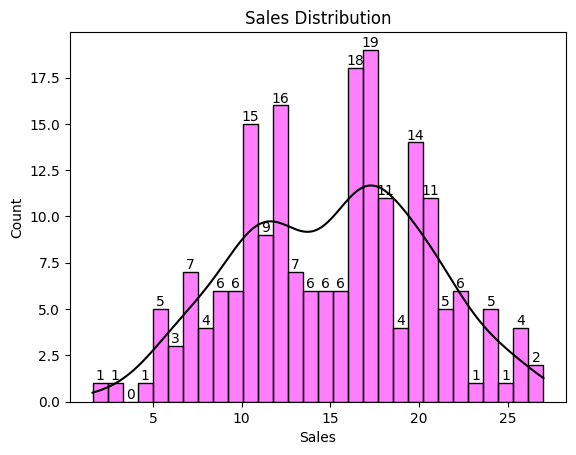

In [ ]:
# Sales Distribution
dr=sns.histplot(data=sales_pred, x='Sales', bins=30, kde=True,color='magenta')
dr.lines[0].set_color('black')
for container in dr.containers:
    dr.bar_label(container, fmt='%d')
plt.title("Sales Distribution")
plt.show()

In [ ]:
# Creating the scatter plot with colored points and trendline
figure = px.scatter(
    data_frame=sales_pred,
    x="Sales",
    y="TV",
    size="TV",
    trendline="ols",
    color="Radio",  # Adding color based on Radio spending
    trendline_color_override="black"  # Color of the trendline
)

# Displaying the figure
figure.show()

In [ ]:
# Creating the scatter plot with colored points and trendline
figure = px.scatter(
    data_frame=sales_pred,
    x="Sales",
    y="TV",
    size="TV",
    trendline="ols",
    color="Newspaper",  # Adding color based on Radio spending
    trendline_color_override="black"  # Color of the trendline
)

# Displaying the figure
figure.show()

In [ ]:
X= sales_pred.drop(columns= ['Sales'],axis=1)
Y=sales_pred['Sales']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=1/3, random_state=42)
print(X.shape, X_test.shape, X_train.shape)

(200, 3) (67, 3) (133, 3)


In [ ]:
# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)
y_pred

array([17.15969401, 20.53034556, 23.79499147,  9.42734423, 21.70851861,
       12.71925934, 21.14916301,  8.77959397, 17.26696538, 16.74765359,
        8.99319499,  8.58768075, 18.36151708,  8.15822449, 12.72195228,
       15.01648787,  8.27468619, 17.94312561, 11.11857467, 20.50720646,
       20.95101796, 12.86006809, 10.99428043, 22.52515182,  9.47022178,
        8.01596867, 20.9194364 , 13.86606525, 10.86317166,  8.0029834 ,
       16.00982714, 10.7211868 , 20.93565369, 10.66791397, 21.63776798,
       21.20409278, 12.21032193, 22.91531719, 12.65840872,  6.56113029,
       11.99294386, 15.36105121, 10.03600911,  9.54728063, 17.26779488,
        7.31182275, 10.47914116, 15.305878  , 11.24130954, 11.80077434,
       13.97060207, 14.71106946, 10.66154988,  9.45130077,  9.09609234,
       12.56734617, 10.5616593 , 25.0875339 ,  7.98277243, 15.88808391,
       21.31188931, 17.06922294, 12.90148235, 10.02790555, 21.0138435 ,
        7.58929456, 23.51912548])

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
# Calculate mean squared error and R^2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 2.773680395420484
R^2 Score: 0.9024082719520714


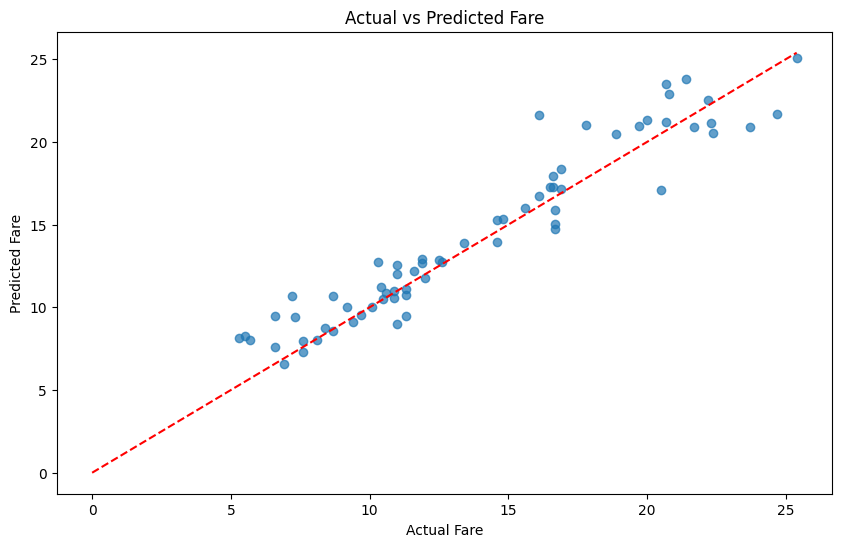

In [ ]:
# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([0, max(y_test)], [0, max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.title('Actual vs Predicted Fare')
plt.show()

In [ ]:
# Displaying the model coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

           Coefficient
TV            0.054233
Radio         0.101227
Newspaper     0.006113


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Training the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
# Making predictions
y_pred = dt_model.predict(X_test)

In [ ]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Decision Tree Mean Squared Error: {mse}')
print(f'Decision Tree R^2 Score: {r2}')

Decision Tree Mean Squared Error: 3.222985074626865
Decision Tree R^2 Score: 0.8865995219114513


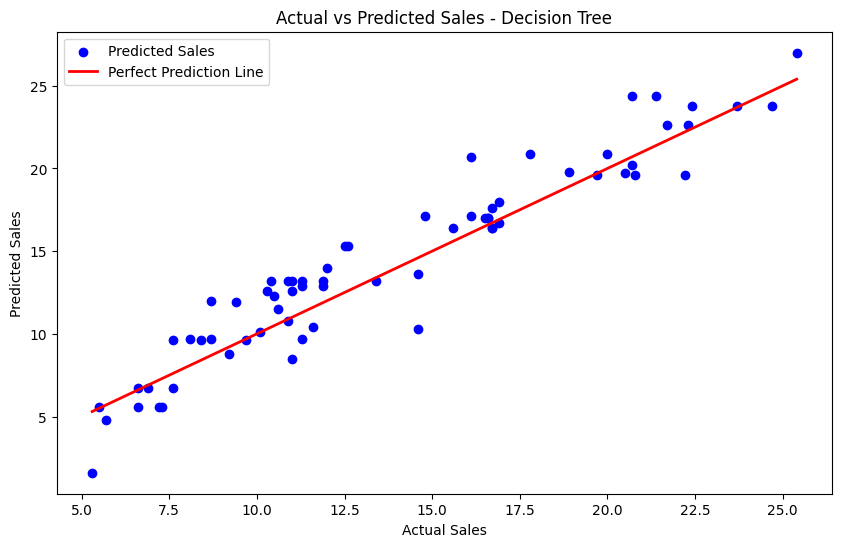

In [ ]:
# Plotting actual vs predicted sales for the Decision Tree model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted Sales')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Perfect Prediction Line')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales - Decision Tree')
plt.legend()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor


In [ ]:
# Training the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Making predictions
y_pred = rf_model.predict(X_test)


In [ ]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Random Forest Mean Squared Error: {mse}')
print(f'Random Forest R^2 Score: {r2}')

Random Forest Mean Squared Error: 1.4491823432835822
Random Forest R^2 Score: 0.9490106324538696


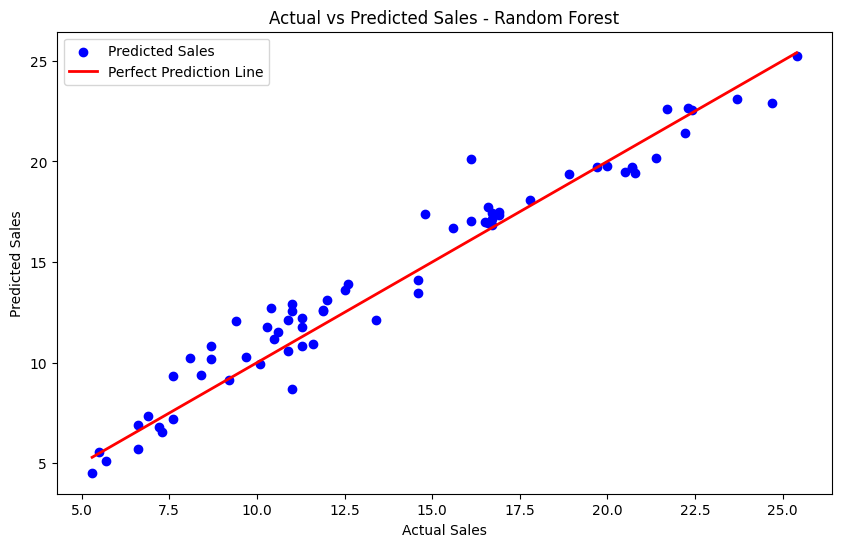

In [ ]:
# Plotting actual vs predicted sales for the Random Forest model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted Sales')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Perfect Prediction Line')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales - Random Forest')
plt.legend()
plt.show()

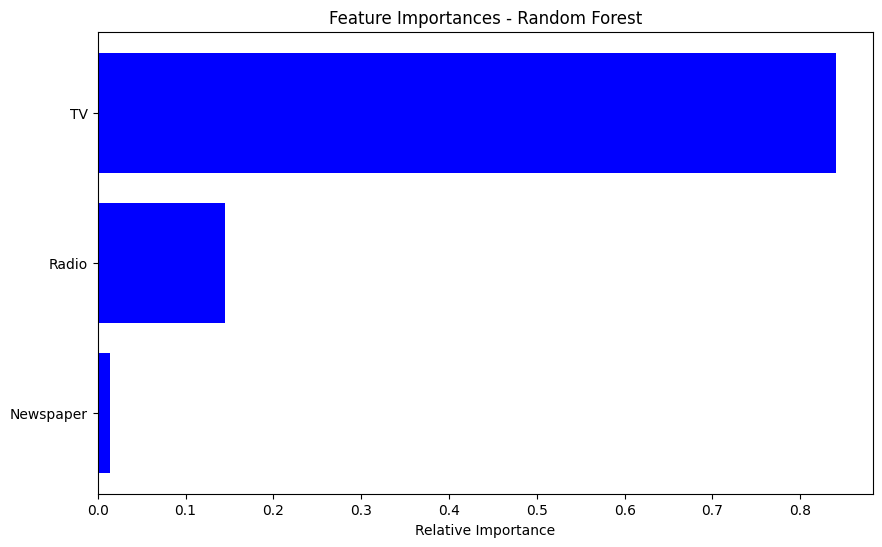

In [ ]:
# Plotting feature importances
importances = rf_model.feature_importances_
features = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title('Feature Importances - Random Forest')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()